In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  
import graphviz
import pydotplus
from sklearn import metrics


In [2]:
dataN = pd.read_csv("dataN.csv")
dataN.head()

,Unnamed: 0,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,0,235,1,30,3748,93.0,5,3500.0,121543.40,0.00,214,Lima,4,3
1,1,0,18,1,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,2
2,2,0,0,1,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,3
3,3,0,0,1,36,5179,20.0,12,2700.0,121543.40,0.00,187,Ancash,0,2
4,4,0,0,1,46,3960,3.0,1,3100.0,2000.00,11010.65,189,Lima,0,2


In [3]:
feature_colsN = ['exp_sf', 'ingreso', 'score', 'dias_lab','nivel_ahorro']
Xn = dataN[feature_colsN] # features
yn = np.array(dataN['mora'])
Xn.shape

(8399, 5)

In [4]:
#El siguiente código coloca el 75% de los datos en un conjunto de entrenamiento y el 25% de los datos en un conjunto de prueba.

X_train, X_test, Y_train, Y_test = train_test_split(Xn, yn, random_state=0)

# Árbol de decisión

In [5]:
'''
    Configuramos el max_depth = 2 para pre podar el árbol y asegurarse de que no tenga una profundidad mayor que 3. 
    También tenga en cuenta que en mi código a continuación, hice random_state = 0 para evitar la aleatoriedad
'''
# create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 0)

# train Decision Tree Classifier
clf = clf.fit(X_train,Y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

# compute model accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7185714285714285


## Importancia de la característica

In [6]:
#El siguiente código muestra las características importantes para cada característica en un modelo de árbol de decisión.

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,exp_sf,0.526
4,nivel_ahorro,0.211
1,ingreso,0.177
2,score,0.070
3,dias_lab,0.015


## Visualización 

In [7]:
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split

r = export_text(clf, feature_names=feature_colsN)

print(r)

|--- exp_sf <= 44.50
|   |--- ingreso <= 2055.19
|   |   |--- nivel_ahorro <= 11.50
|   |   |   |--- class: 1
|   |   |--- nivel_ahorro >  11.50
|   |   |   |--- class: 1
|   |--- ingreso >  2055.19
|   |   |--- nivel_ahorro <= 11.50
|   |   |   |--- class: 1
|   |   |--- nivel_ahorro >  11.50
|   |   |   |--- class: 1
|--- exp_sf >  44.50
|   |--- score <= 191.50
|   |   |--- dias_lab <= 4143.50
|   |   |   |--- class: 0
|   |   |--- dias_lab >  4143.50
|   |   |   |--- class: 1
|   |--- score >  191.50
|   |   |--- nivel_ahorro <= 11.50
|   |   |   |--- class: 1
|   |   |--- nivel_ahorro >  11.50
|   |   |   |--- class: 0



In [8]:
from sklearn.model_selection import cross_val_score 
a = cross_val_score(clf, X_train, Y_train, cv = 3, scoring="accuracy")
a.mean()

0.7178909836127558

# SVM

In [86]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, Y_train)

SVC(C=100, kernel='linear', random_state=123)

TypeError: unhashable type: 'Series'

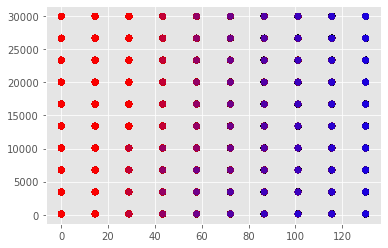

In [103]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x1 = np.linspace(np.min(X_train.exp_sf), np.max(X_train.exp_sf), 10)
x2 = np.linspace(np.min(X_train.ingreso), np.max(X_train.ingreso), 10)
x3 = np.linspace(np.min(X_train.score), np.max(X_train.score), 10)
x4 = np.linspace(np.min(X_train.dias_lab), np.max(X_train.dias_lab), 10)
x5 = np.linspace(np.min(X_train.nivel_ahorro), np.max(X_train.nivel_ahorro), 10)

y1, y2, y3, y4, y5 = np.meshgrid(x1,x2,x3,x4,x5)
grid = np.vstack([y1.ravel(), y2.ravel(),y3.ravel(), y4.ravel(),y5.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.exp_sf,X_train.ingreso,X_train.score,X_train.dias_lab,X_train.nivel_ahorro,c1=Y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    y1,
    y2,
    y3,
    y4,
    y5,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

In [104]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [106]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = Y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 71.57142857142857%
